### 投資利益率を算出
#### https://note.com/scilabcafe/n/n12bcc478cd0b

In [1]:
import pandas_datareader.data as web
import datetime
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

start = '2022-10-01'
end = datetime.date.today()

# stooqで日経平均株価を取得（日付降順でデータ取得されるので注意）
df = web.DataReader('^NKX', 'stooq', start, end)

# 日付を昇順に並び替える
df.sort_index(inplace=True)

In [2]:
# Close 列のデータを１行下にずらし、Close_1day_before（前日の終値を）列を作成
df['Close_1day_before'] = df['Close'].shift(1)

# Close列とClose_1day_before（1日前の終値）列を横比較できるように列を入れ替えて表示
df[['Open', 'High', 'Low', 'Volume', 'Close', 'Close_1day_before']]

,Open,High,Low,Volume,Close,Close_1day_before
Date,,,,,,
2022-10-03,25778.95,26223.84,25623.67,8.070289e+08,26215.79,NaN
2022-10-04,26653.49,26994.44,26633.52,8.706164e+08,26992.21,26215.79
2022-10-05,27211.32,27216.80,27031.28,7.328886e+08,27120.53,26992.21
2022-10-06,27137.98,27399.19,27137.98,6.937130e+08,27311.30,27120.53
2022-10-07,26975.92,27198.83,26921.90,6.667320e+08,27116.11,27311.30
...,...,...,...,...,...,...
2024-01-04,33193.05,33299.39,32693.18,1.172839e+09,33288.29,33464.17
2024-01-05,33397.52,33568.04,33257.43,1.153316e+09,33377.42,33288.29
2024-01-09,33704.83,33990.28,33600.32,1.120661e+09,33763.18,33377.42


In [3]:
# 単純利益率の算出
df['simple_return'] = (df['Close'] / df['Close_1day_before']) - 1
df[['simple_return']]

,simple_return
Date,
2022-10-03,NaN
2022-10-04,0.029617
2022-10-05,0.004754
2022-10-06,0.007034
2022-10-07,-0.007147
...,...
2024-01-04,-0.005256
2024-01-05,0.002678
2024-01-09,0.011558


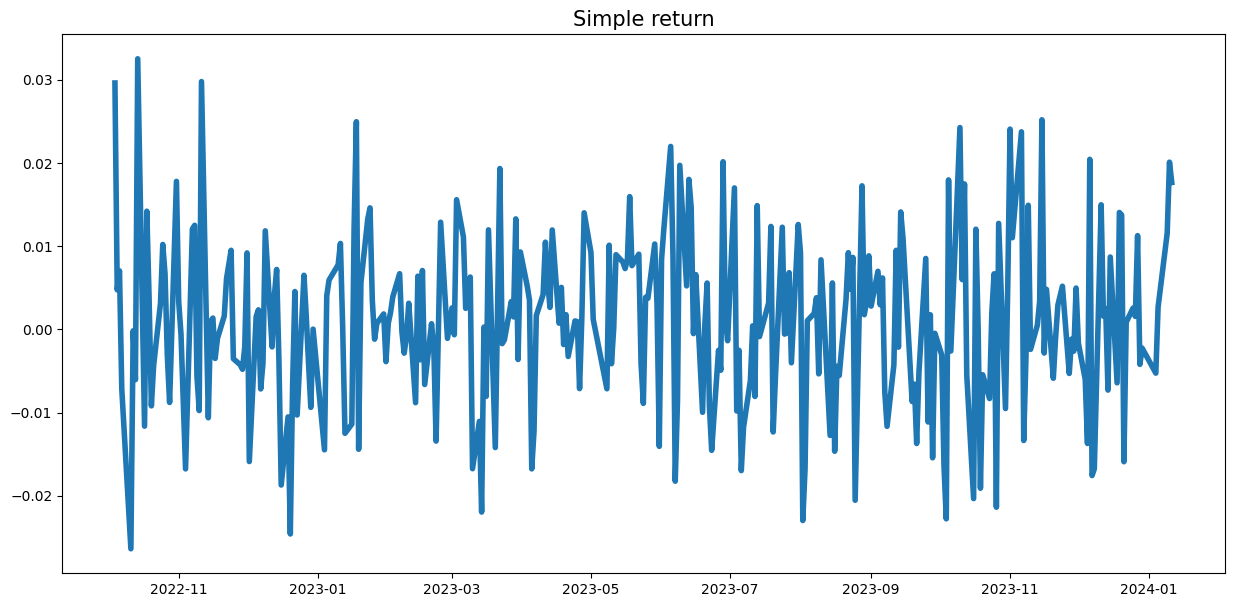

In [4]:
# 単純利益率の推移をプロット
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(df.index, df['simple_return'], lw=4)
ax.set_title("Simple return",fontsize=15)
plt.show()

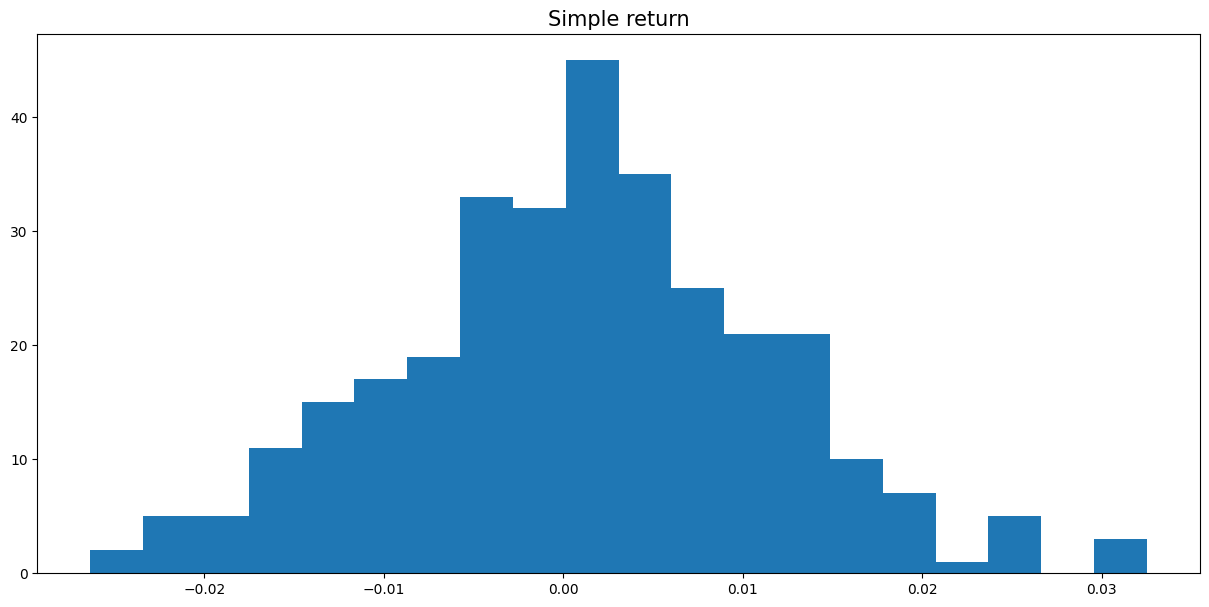

In [5]:
# 単純利益率のヒストグラム
fig, ax = plt.subplots(figsize=(15,7))
ax.hist(df['simple_return'], bins=20)
ax.set_title("Simple return",fontsize=15)
plt.show()

In [6]:
# 対数利益率の算出
df['log_return'] = np.log(df['Close'] / df['Close_1day_before'])
df

,Open,High,Low,Close,Volume,Close_1day_before,simple_return,log_return
Date,,,,,,,,
2022-10-03,25778.95,26223.84,25623.67,26215.79,8.070289e+08,NaN,NaN,NaN
2022-10-04,26653.49,26994.44,26633.52,26992.21,8.706164e+08,26215.79,0.029617,0.029186
2022-10-05,27211.32,27216.80,27031.28,27120.53,7.328886e+08,26992.21,0.004754,0.004743
2022-10-06,27137.98,27399.19,27137.98,27311.30,6.937130e+08,27120.53,0.007034,0.007010
2022-10-07,26975.92,27198.83,26921.90,27116.11,6.667320e+08,27311.30,-0.007147,-0.007173
...,...,...,...,...,...,...,...,...
2024-01-04,33193.05,33299.39,32693.18,33288.29,1.172839e+09,33464.17,-0.005256,-0.005270
2024-01-05,33397.52,33568.04,33257.43,33377.42,1.153316e+09,33288.29,0.002678,0.002674
2024-01-09,33704.83,33990.28,33600.32,33763.18,1.120661e+09,33377.42,0.011558,0.011491


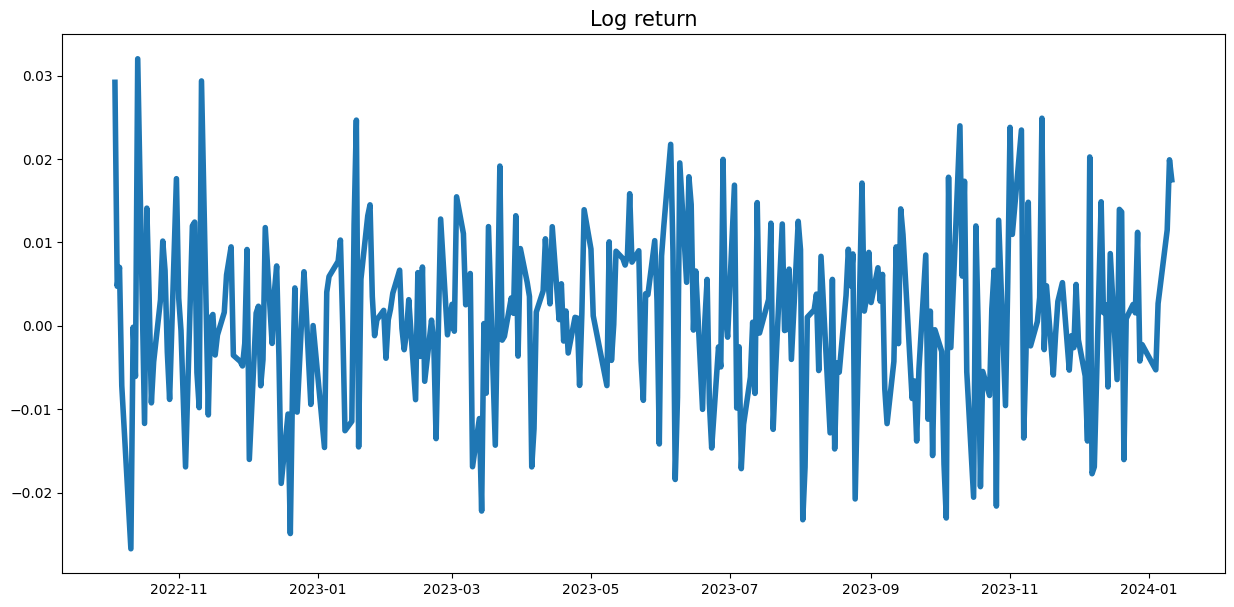

In [7]:
# 対数利益率の推移をプロット
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(df.index, df['log_return'], lw=4)
ax.set_title("Log return",fontsize=15)
plt.show()

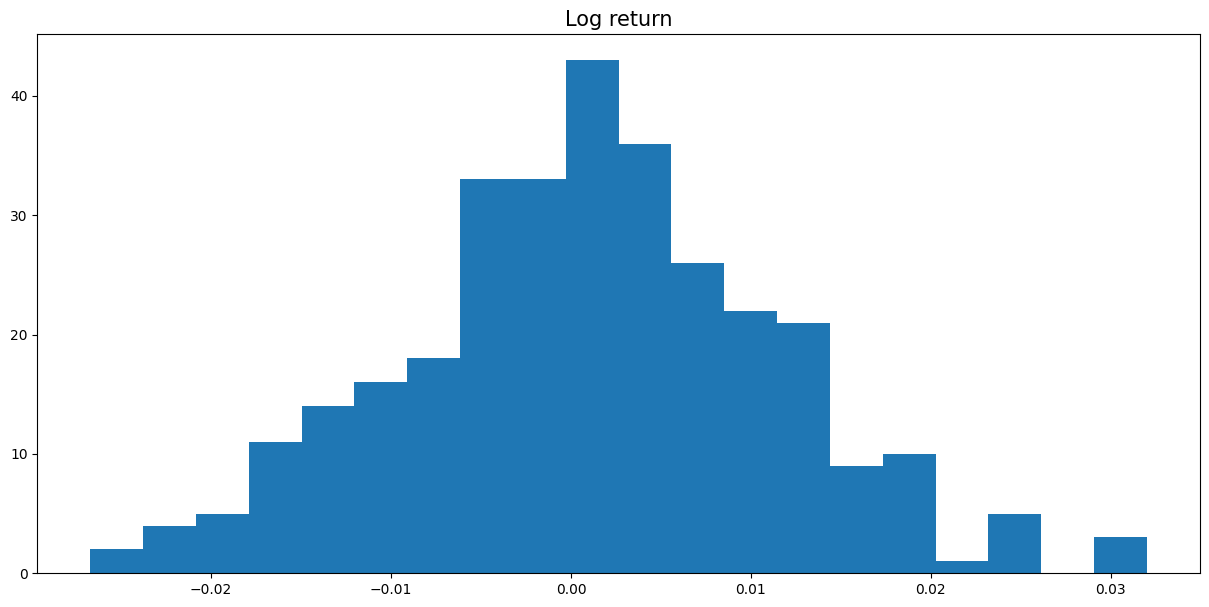

In [9]:
# 対数利益率のヒストグラム
fig, ax = plt.subplots(figsize=(15,7))
ax.hist(df['log_return'], bins=20)
ax.set_title("Log return",fontsize=15)
plt.show()

In [10]:
#1日あたりの利益率
avg_return_d = df['simple_return'].mean()

#1年あたりの利益率
avg_return_a = avg_return_d * 250

print(str(round(avg_return_a, 4) * 100) + '%')

24.63%


In [11]:
#1日あたりの利益率
avg_return_d = df['log_return'].mean()

#1年あたりの利益率
avg_return_a = avg_return_d * 250

print(str(round(avg_return_a, 4) * 100) + '%')

23.27%
